# ***EDA ON WEBSITE TRAFFIC FORECASTING***

# ***Table of Contents***

 1. Introduction

 2. Data Preprocessing


 * Comma removal and data type
   conversion

 3. Distribution Analysis
 * Histogram visualizations

 * Normality check function and analysis

 4. Time Series Analysis
 * Trends of traffic metrics over time

 5. Day-wise Analysis

 * Daily grouped analysis for all traffic metrics

 6. Comparison Across Days

 * Bar and box plots for daily metrics
 7. Correlation Analysis

 * Heatmap of correlations between traffic metrics and day codes

 8. Conclusion

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

In [ ]:
data = pd.read_csv('/content/daily-website-visitors.csv')

In [ ]:
data.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   object
 5   Unique.Visits      2167 non-null   object
 6   First.Time.Visits  2167 non-null   object
 7   Returning.Visits   2167 non-null   object
dtypes: int64(2), object(6)
memory usage: 135.6+ KB


In [ ]:
def remove_commas(x):
    return float(x.replace(',', ''))

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Page.Loads'] = data['Page.Loads'].apply(lambda x : remove_commas(x))
data['Unique.Visits'] = data['Unique.Visits'].apply(lambda x : remove_commas(x))
data['First.Time.Visits'] = data['First.Time.Visits'].apply(lambda x : remove_commas(x))
data['Returning.Visits'] = data['Returning.Visits'].apply(lambda x : remove_commas(x))

In [ ]:
data.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,2014-09-14,2146.0,1582.0,1430.0,152.0
1,2,Monday,2,2014-09-15,3621.0,2528.0,2297.0,231.0
2,3,Tuesday,3,2014-09-16,3698.0,2630.0,2352.0,278.0
3,4,Wednesday,4,2014-09-17,3667.0,2614.0,2327.0,287.0
4,5,Thursday,5,2014-09-18,3316.0,2366.0,2130.0,236.0


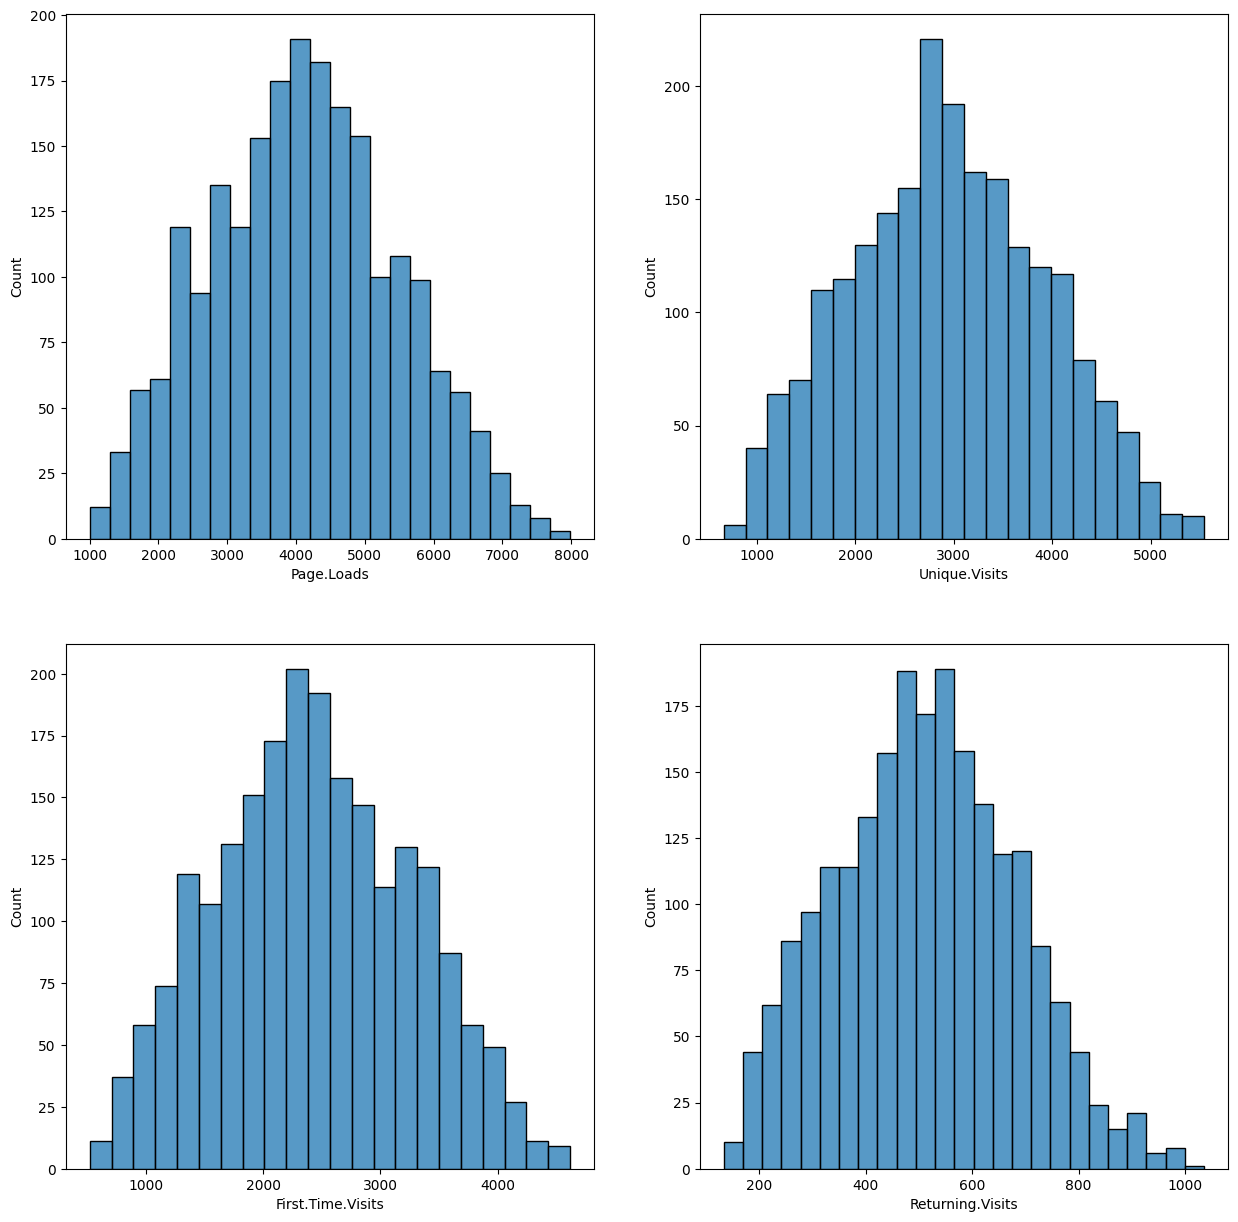

In [ ]:
cols_to_plot = ['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']
plt.figure(figsize=(15, 15))
for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=data, x=col)

In [ ]:
def check_normality(data, col):
    mean = int(np.mean(data[col]))
    median = int(np.median(data[col]))
    mode_ = int(mode(data[col])[0][0])

    print("mean", ":", mean, "median", ":", median, "mode", ":", mode_)
    if mean == median == mode_:
        print("{} Distribution is Normal".format(col))
    elif mean > median and mean > mode_ and mode_ < median:
        print("{} Distribution is skewed towards right".format(col))
    else:
        print("{} Distribution is skewed towards left".format(col))

In [ ]:
def check_normality(data, col):
    mean = int(np.mean(data[col]))
    median = int(np.median(data[col]))
    mode_ = int(pymode(data[col]))

    print("mean", ":", mean, "median", ":", median, "mode", ":", mode_)
    if mean == median == mode_:
        print("{} Distribution is Normal".format(col))
    elif mean > median and mean > mode_ and mode_ < median:
        print("{} Distribution is skewed towards right".format(col))
    else:
        print("{} Distribution is skewed towards left".format(col))

<ipython-input-16-335db3c93d81>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


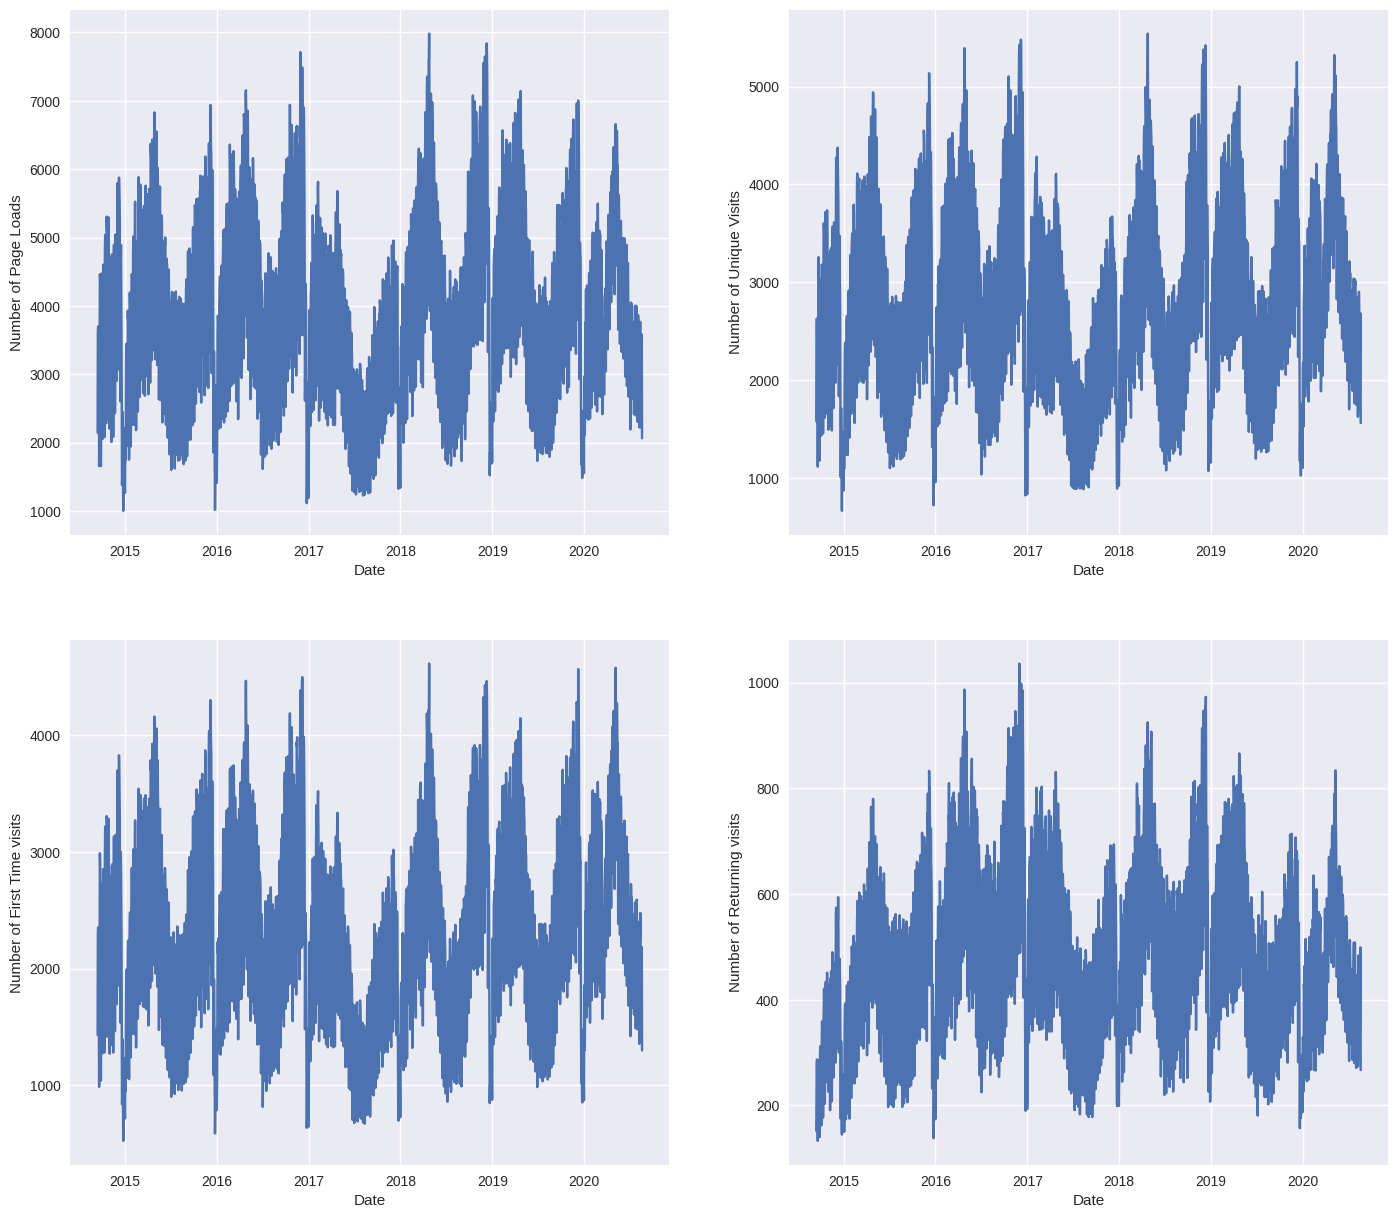

In [ ]:
figure, ax = plt.subplots(2, 2, figsize=(17, 15))
plt.style.use('seaborn')
ax1 = ax[0]
ax2 = ax[1]
ax1[0].plot(data['Date'], data['Page.Loads'])
ax1[0].set_xlabel("Date")
ax1[0].set_ylabel("Number of Page Loads")
ax1[1].plot(data['Date'], data['Unique.Visits'])
ax1[1].set_xlabel("Date")
ax1[1].set_ylabel("Number of Unique Visits")
ax2[0].plot(data['Date'], data['First.Time.Visits'])
ax2[0].set_xlabel("Date")
ax2[0].set_ylabel("Number of First Time visits")
ax2[1].plot(data['Date'], data['Returning.Visits'])
ax2[1].set_xlabel("Date")
ax2[1].set_ylabel("Number of Returning visits")
figure.show()

In [ ]:
day_grouped_data = data.groupby('Day')

In [ ]:
def day_wise_EDA(day):
    sun_data = day_grouped_data.get_group(day)
    figure, ax = plt.subplots(2, 2, figsize=(17, 15))
    plt.style.use('seaborn')

    ax1 = ax[0]
    ax2 = ax[1]
    print("=================================================================={} ANALYSIS======================================================".format(day.upper()))
    ax1[0].plot(sun_data['Date'], sun_data['Page.Loads'])
    ax1[0].set_xlabel("Date")
    ax1[0].set_ylabel("Number of Page Loads")
    ax1[1].plot(sun_data['Date'], sun_data['Unique.Visits'])
    ax1[1].set_xlabel("Date")
    ax1[1].set_ylabel("Number of Unique Visits")
    ax2[0].plot(sun_data['Date'], sun_data['First.Time.Visits'])
    ax2[0].set_xlabel("Date")
    ax2[0].set_ylabel("Number of First Time visits")
    ax2[1].plot(sun_data['Date'], sun_data['Returning.Visits'])
    ax2[1].set_xlabel("Date")
    ax2[1].set_ylabel("Number of Returning visits")

    figure.show()

<ipython-input-19-91b486c40426>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


==================================================================SUNDAY ANALYSIS======================================================


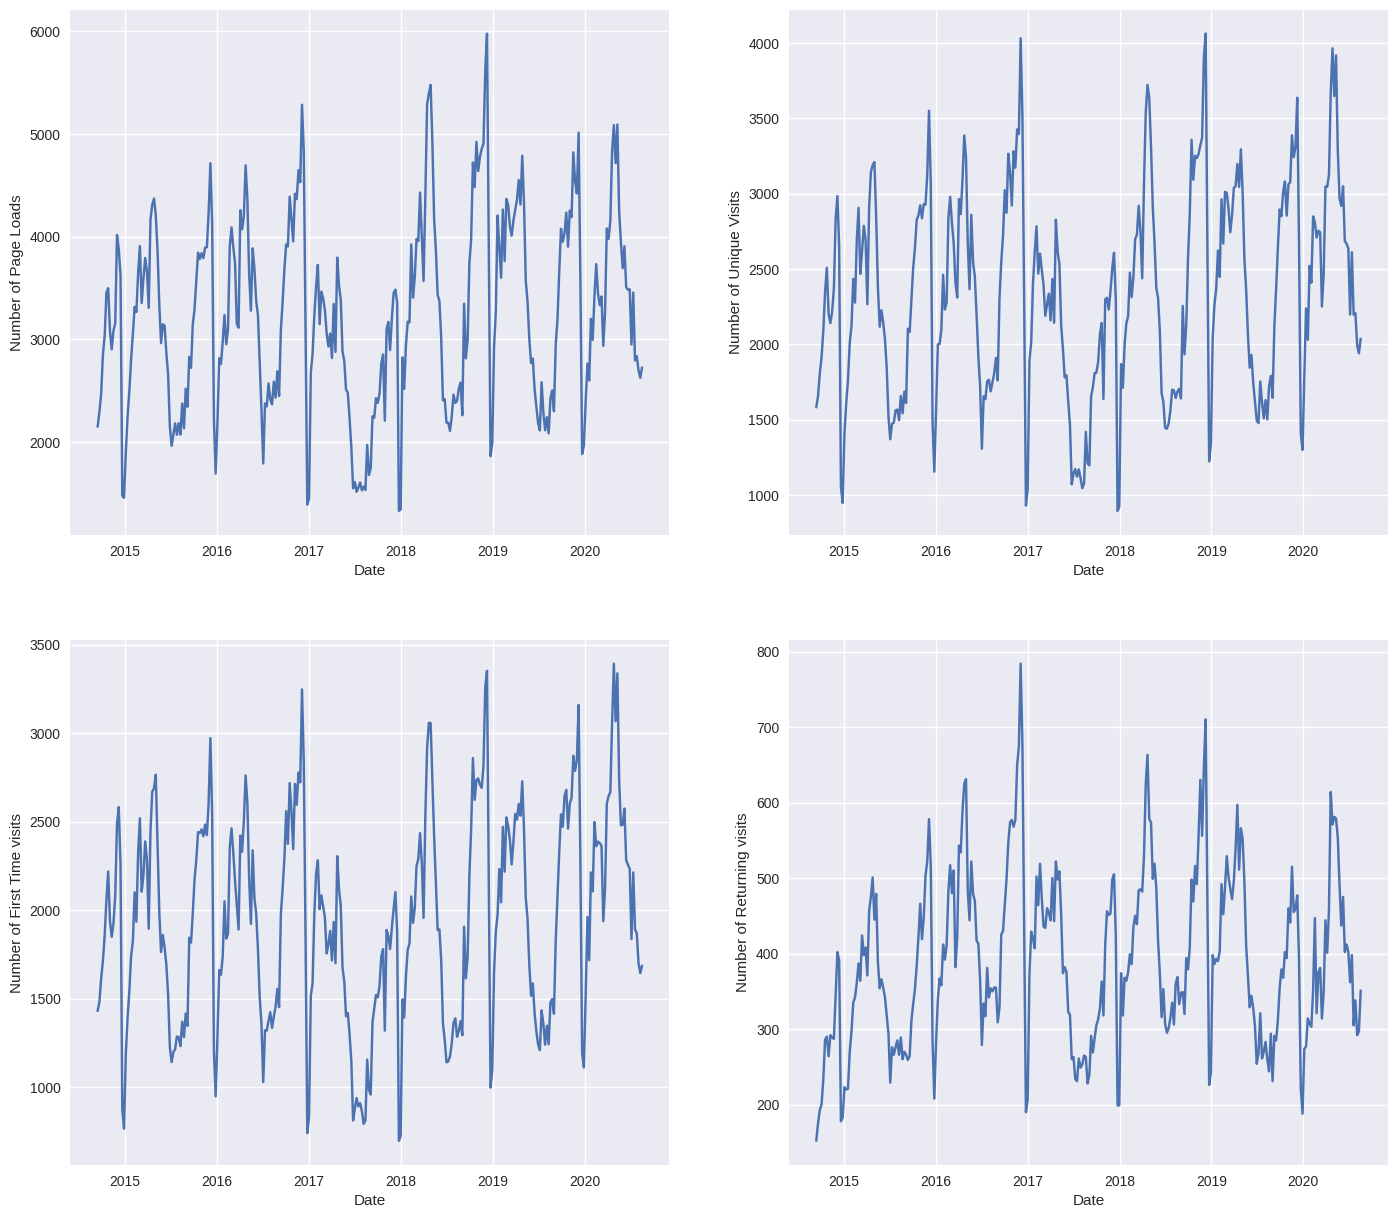

In [ ]:
day_wise_EDA('Sunday')

<ipython-input-19-91b486c40426>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


==================================================================MONDAY ANALYSIS======================================================


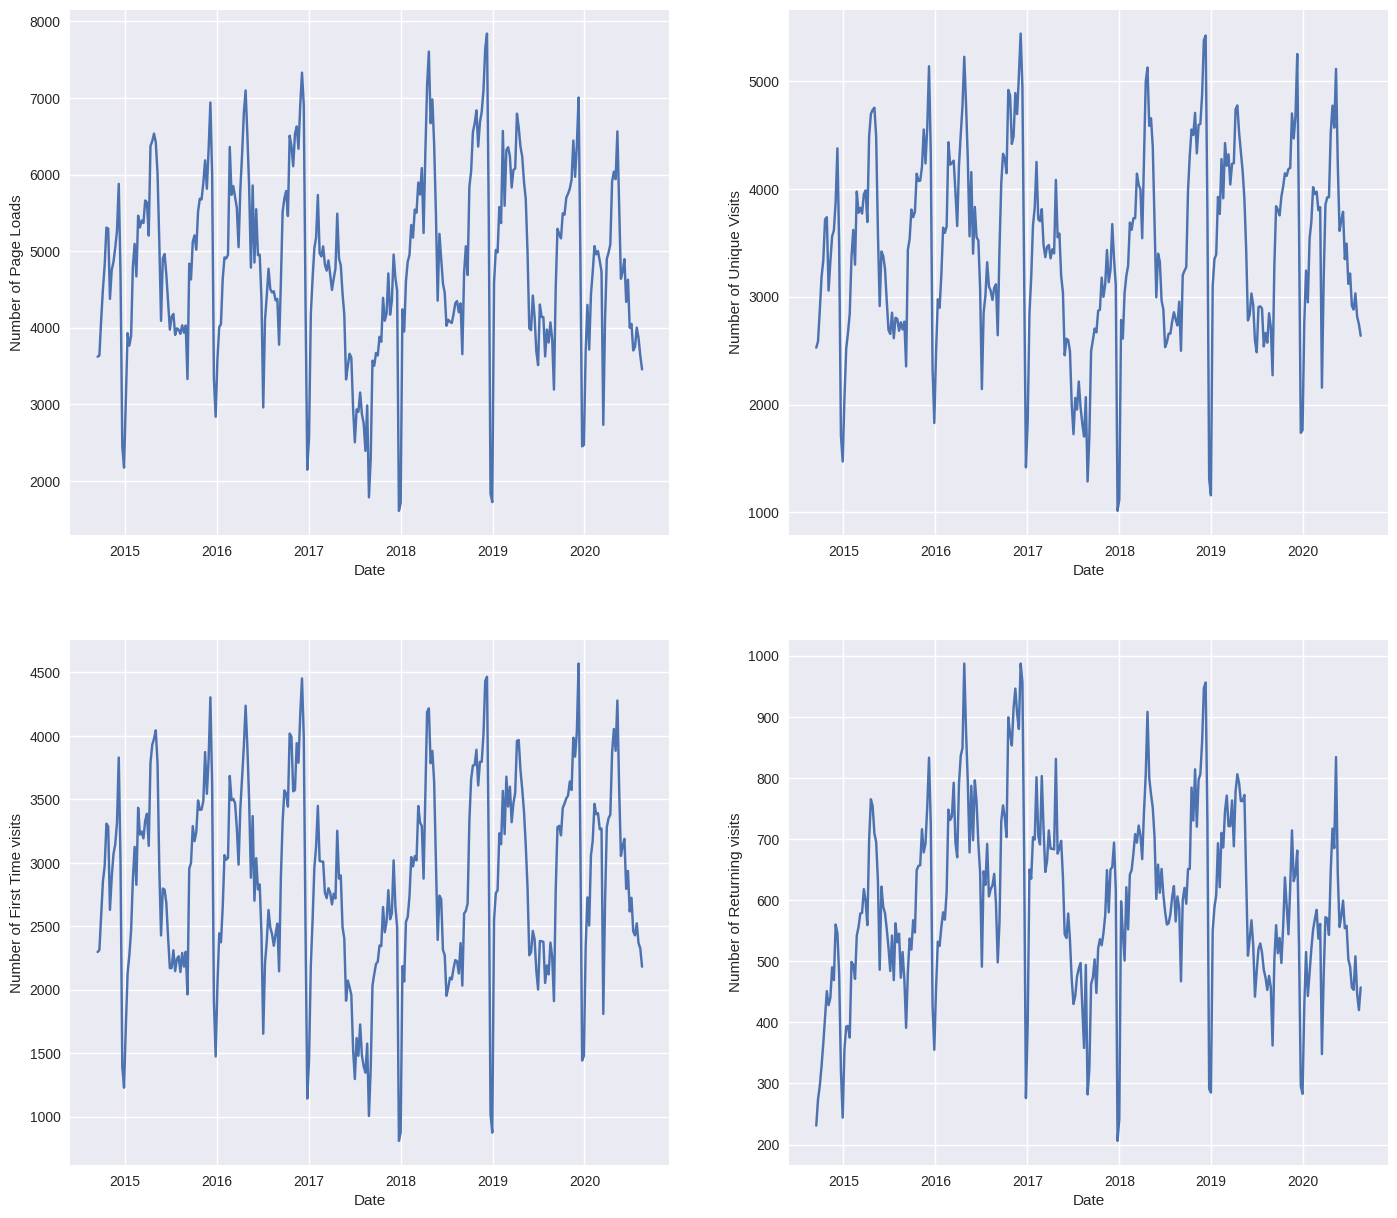

In [ ]:
day_wise_EDA('Monday')

<ipython-input-19-91b486c40426>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


==================================================================TUESDAY ANALYSIS======================================================


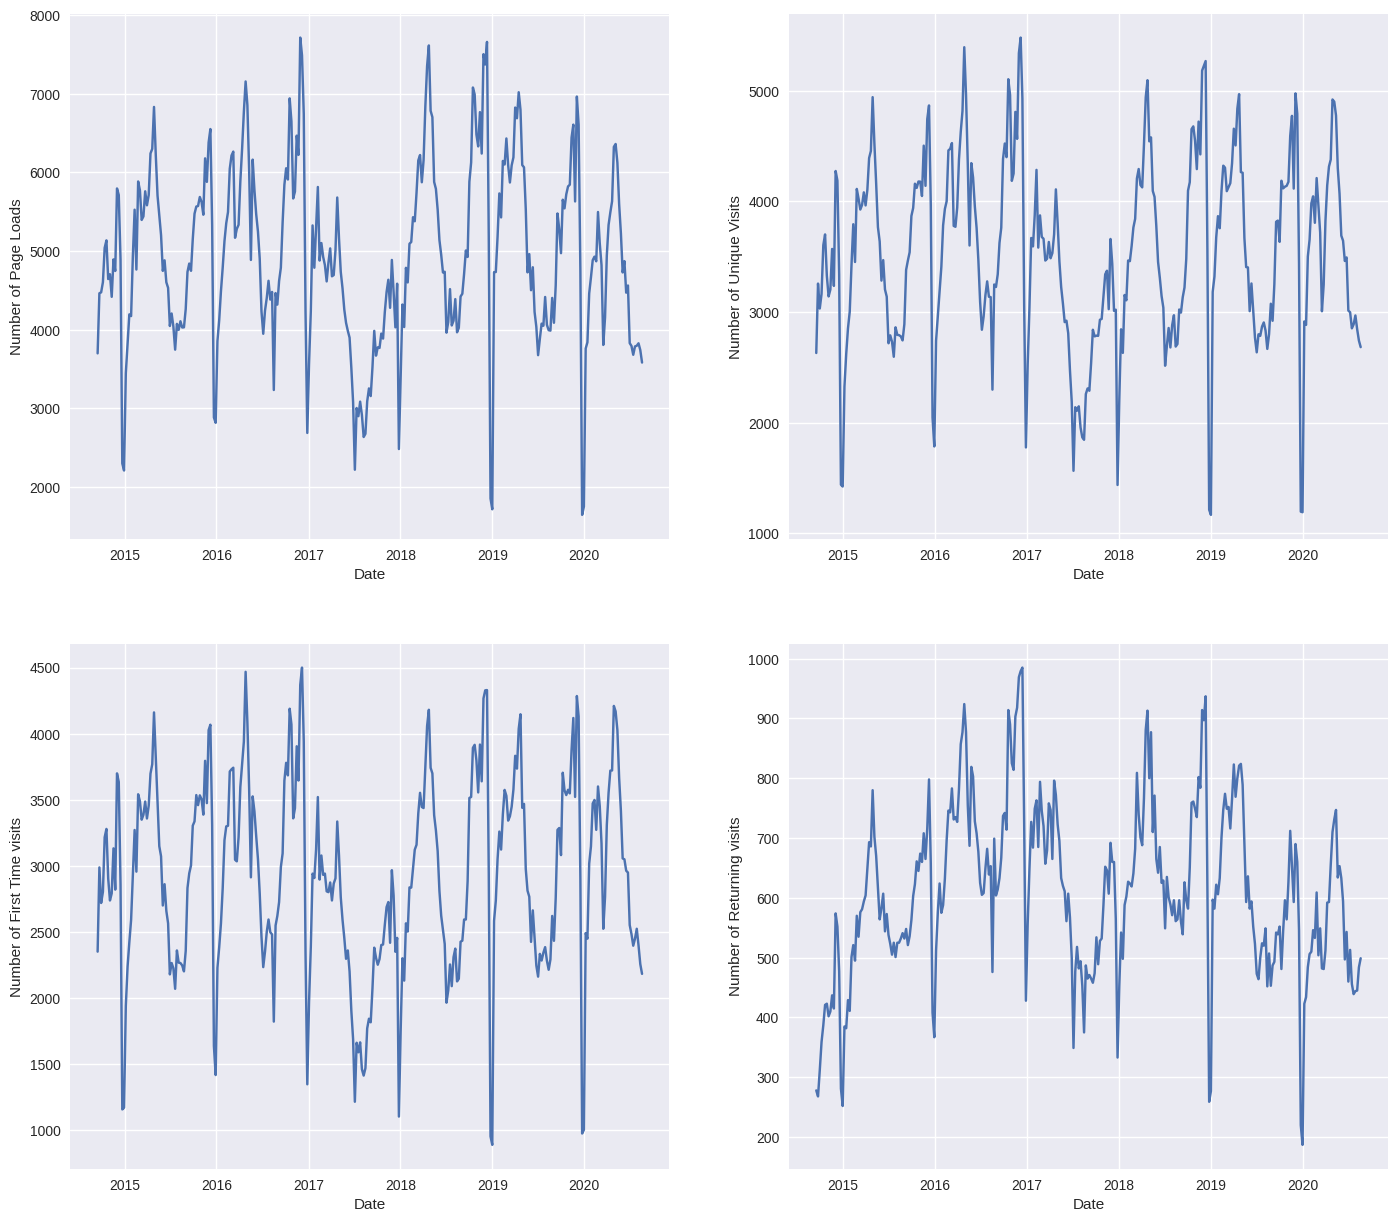

In [ ]:
day_wise_EDA('Tuesday')

<ipython-input-19-91b486c40426>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


==================================================================WEDNESDAY ANALYSIS======================================================


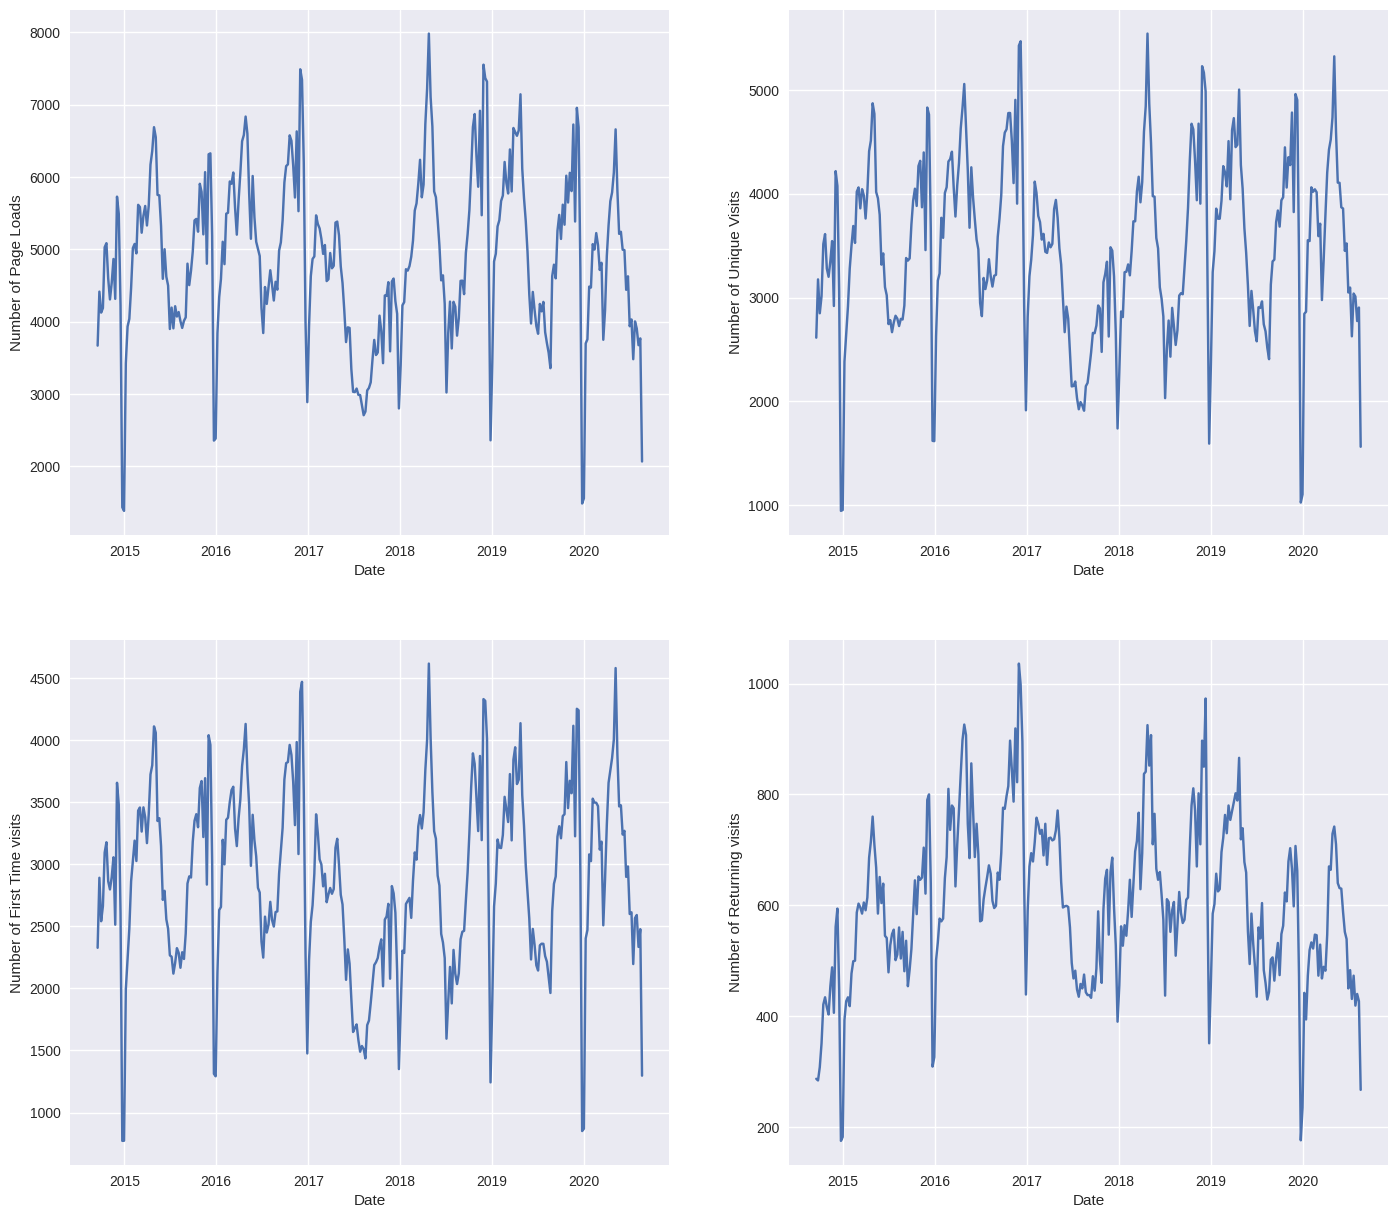

In [ ]:
day_wise_EDA('Wednesday')

<ipython-input-19-91b486c40426>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


==================================================================THURSDAY ANALYSIS======================================================


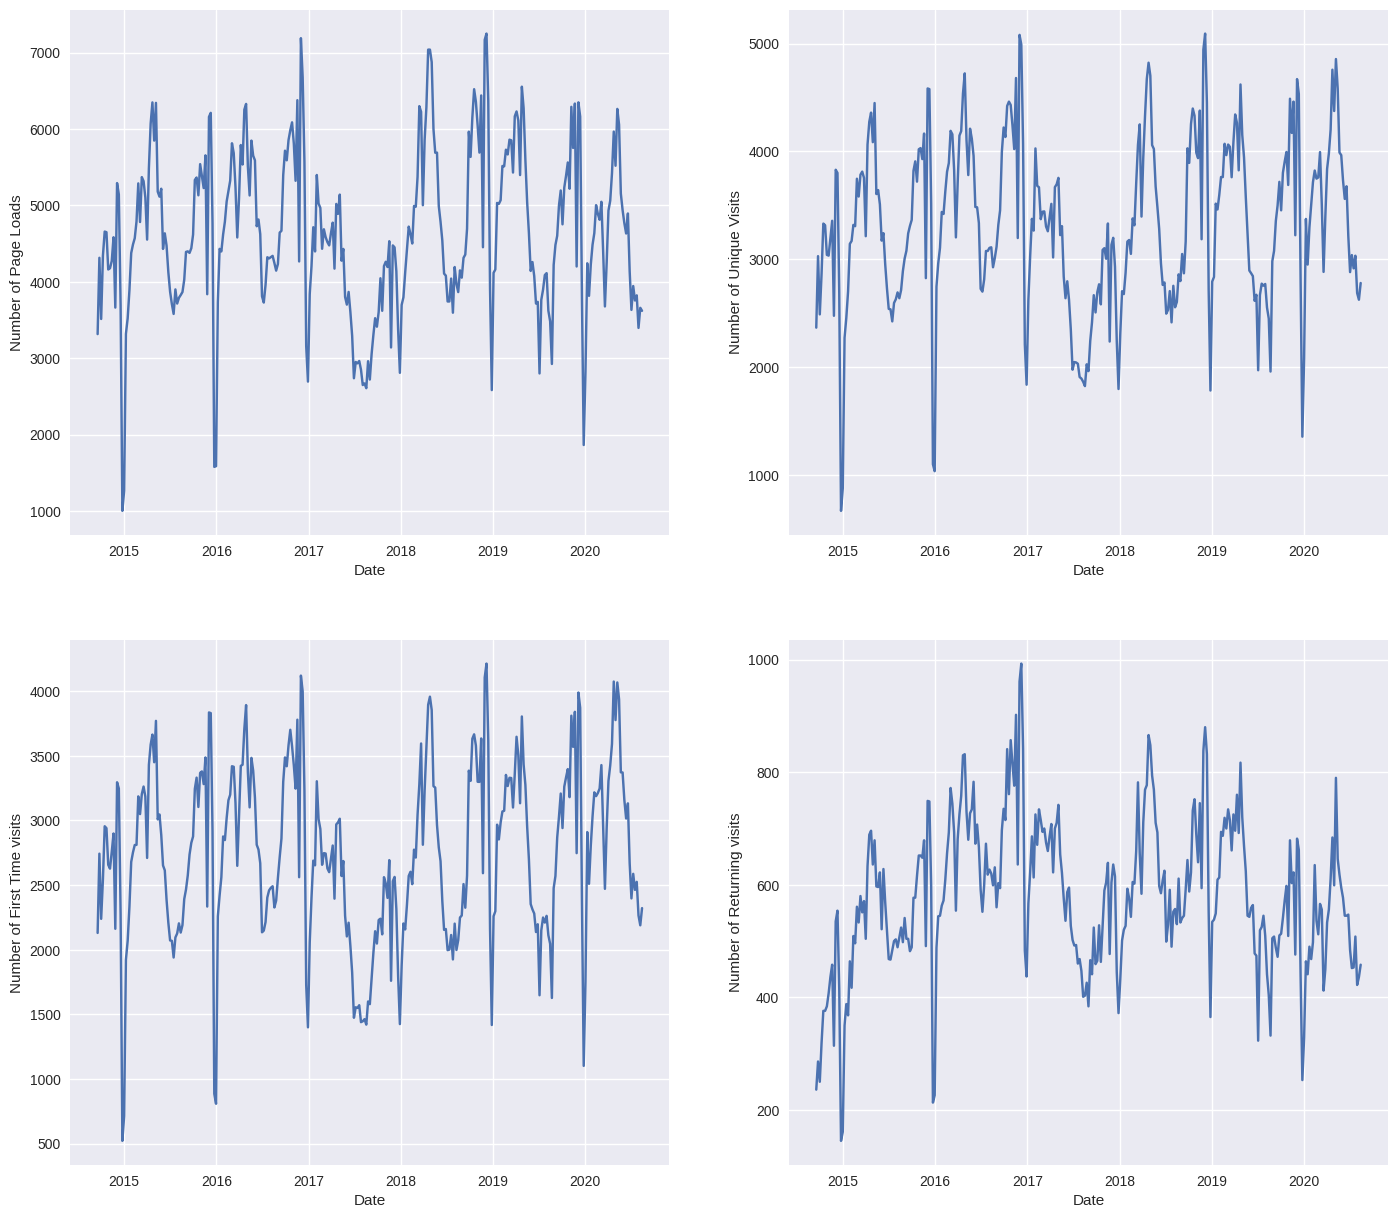

In [ ]:
day_wise_EDA('Thursday')

<ipython-input-19-91b486c40426>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


==================================================================FRIDAY ANALYSIS======================================================


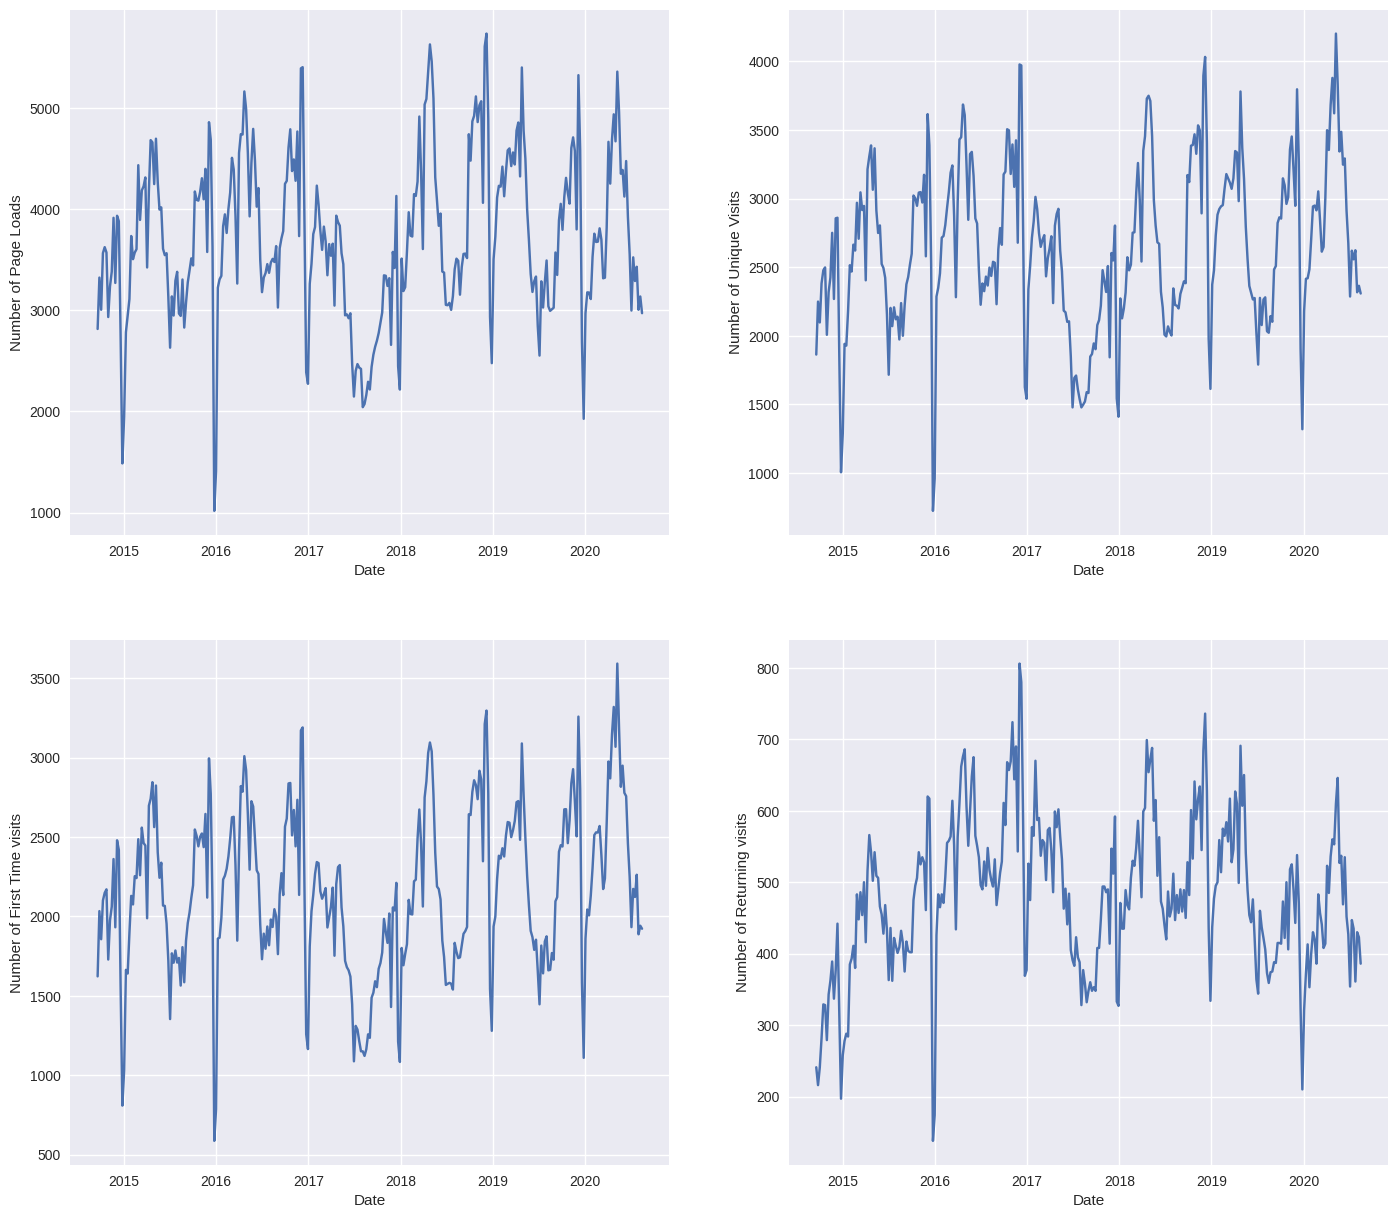

In [ ]:
day_wise_EDA('Friday')

<ipython-input-19-91b486c40426>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


==================================================================SATURDAY ANALYSIS======================================================


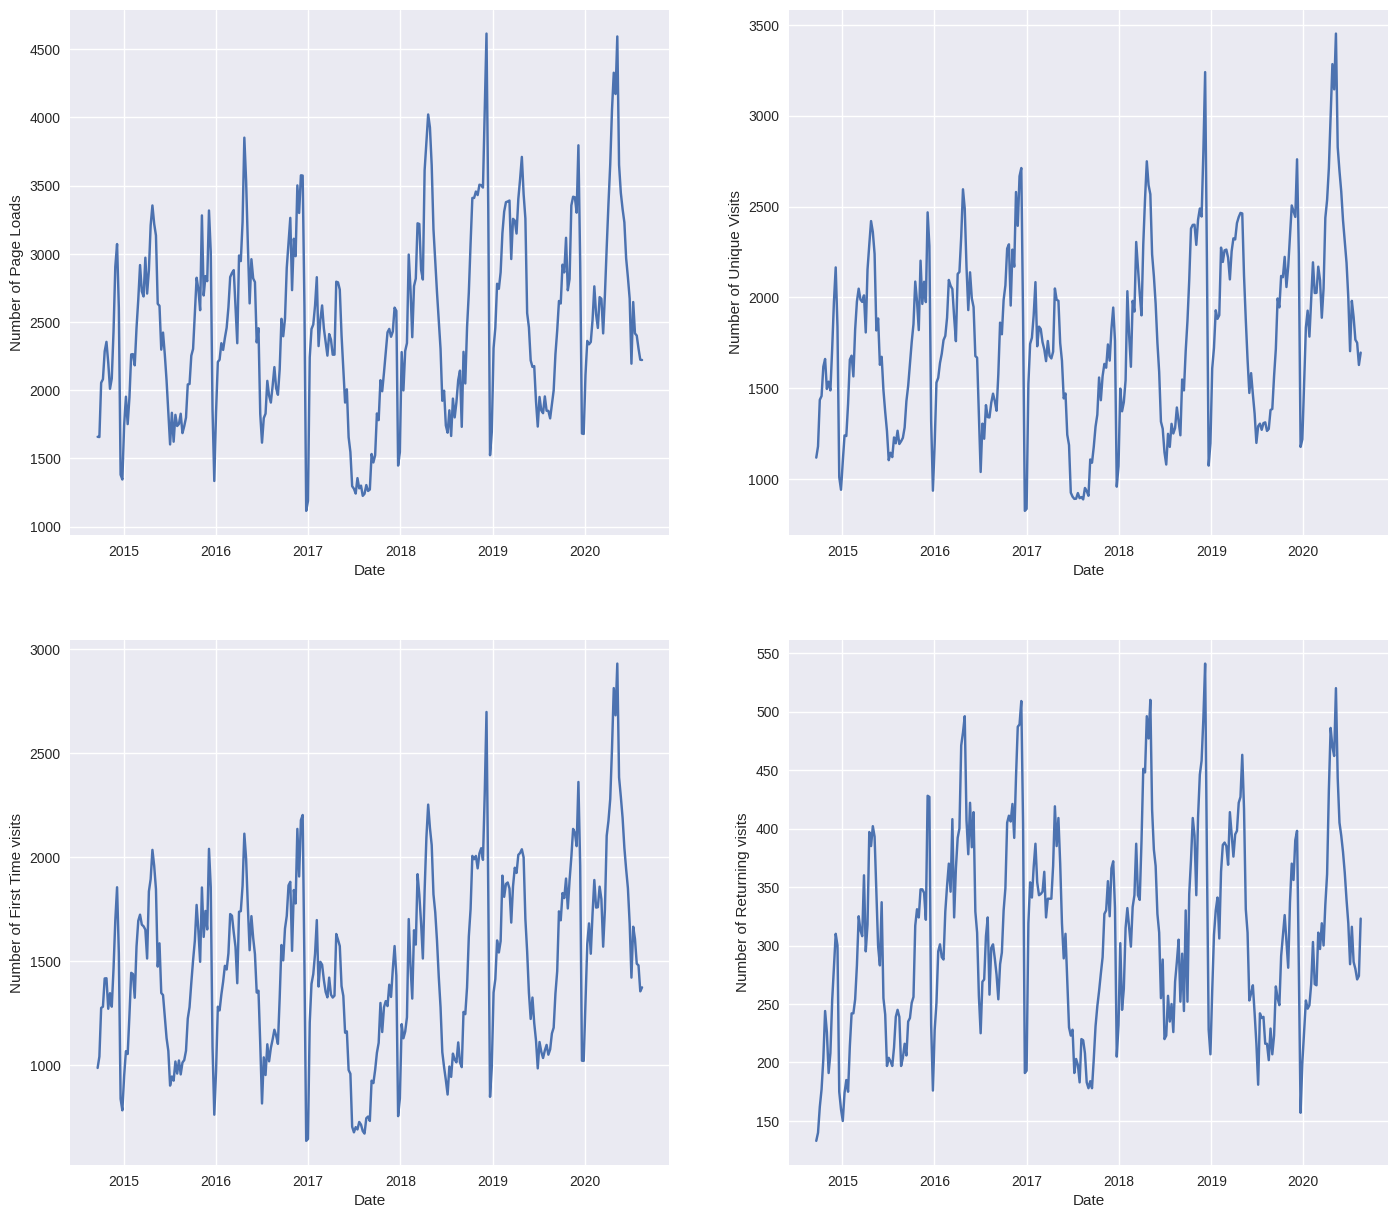

In [ ]:
day_wise_EDA('Saturday')

In [ ]:
avg_day_data = day_grouped_data.mean().reset_index().drop('Row', axis=1)
avg_day_data

,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,Friday,6.0,2017-09-01 00:00:00,3719.860841,2646.770227,2164.417476,482.352751
1,Monday,2.0,2017-08-31 12:00:00,4845.680645,3458.425806,2858.180645,600.245161
2,Saturday,7.0,2017-09-02 00:00:00,2501.025890,1786.747573,1477.181230,309.566343
3,Sunday,1.0,2017-08-30 12:00:00,3246.980645,2341.270968,1949.025806,392.245161
4,Thursday,5.0,2017-08-31 00:00:00,4651.355987,3327.553398,2747.317152,580.236246
5,Tuesday,3.0,2017-09-01 12:00:00,4955.335484,3539.293548,2928.232258,611.061290
6,Wednesday,4.0,2017-09-02 12:00:00,4893.916129,3502.012903,2895.490323,606.522581


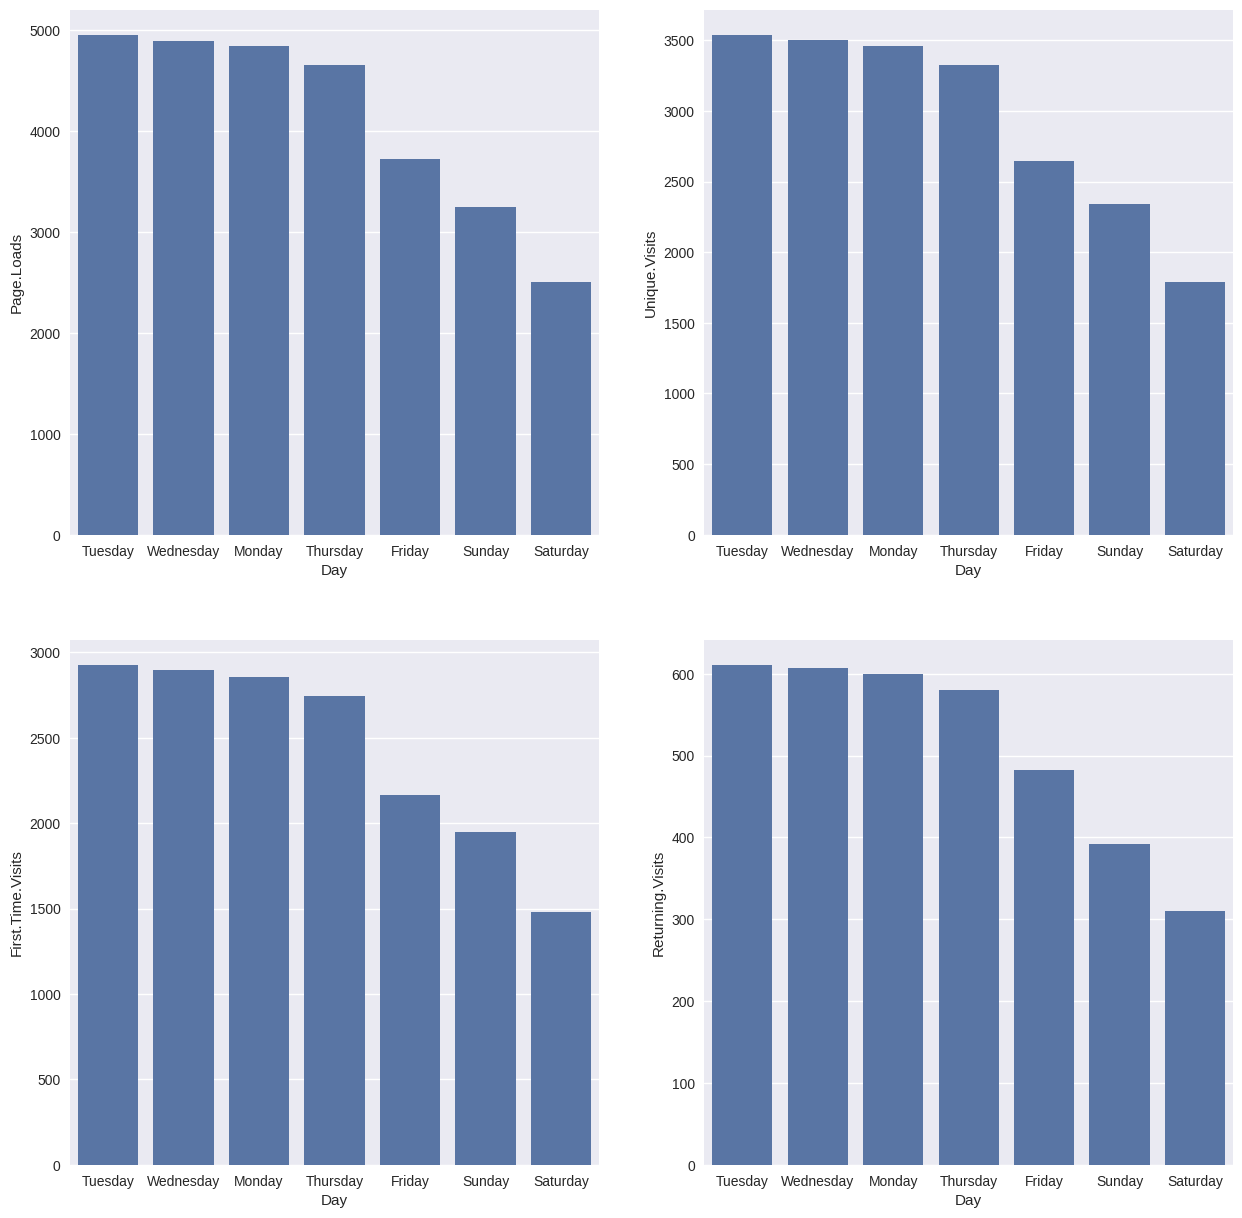

In [ ]:
cols_to_plot = ['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']
plt.figure(figsize=(15, 15))
for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 2, i+1)
    sns.barplot(data=avg_day_data.sort_values(by=col, ascending=False), x='Day', y=col)

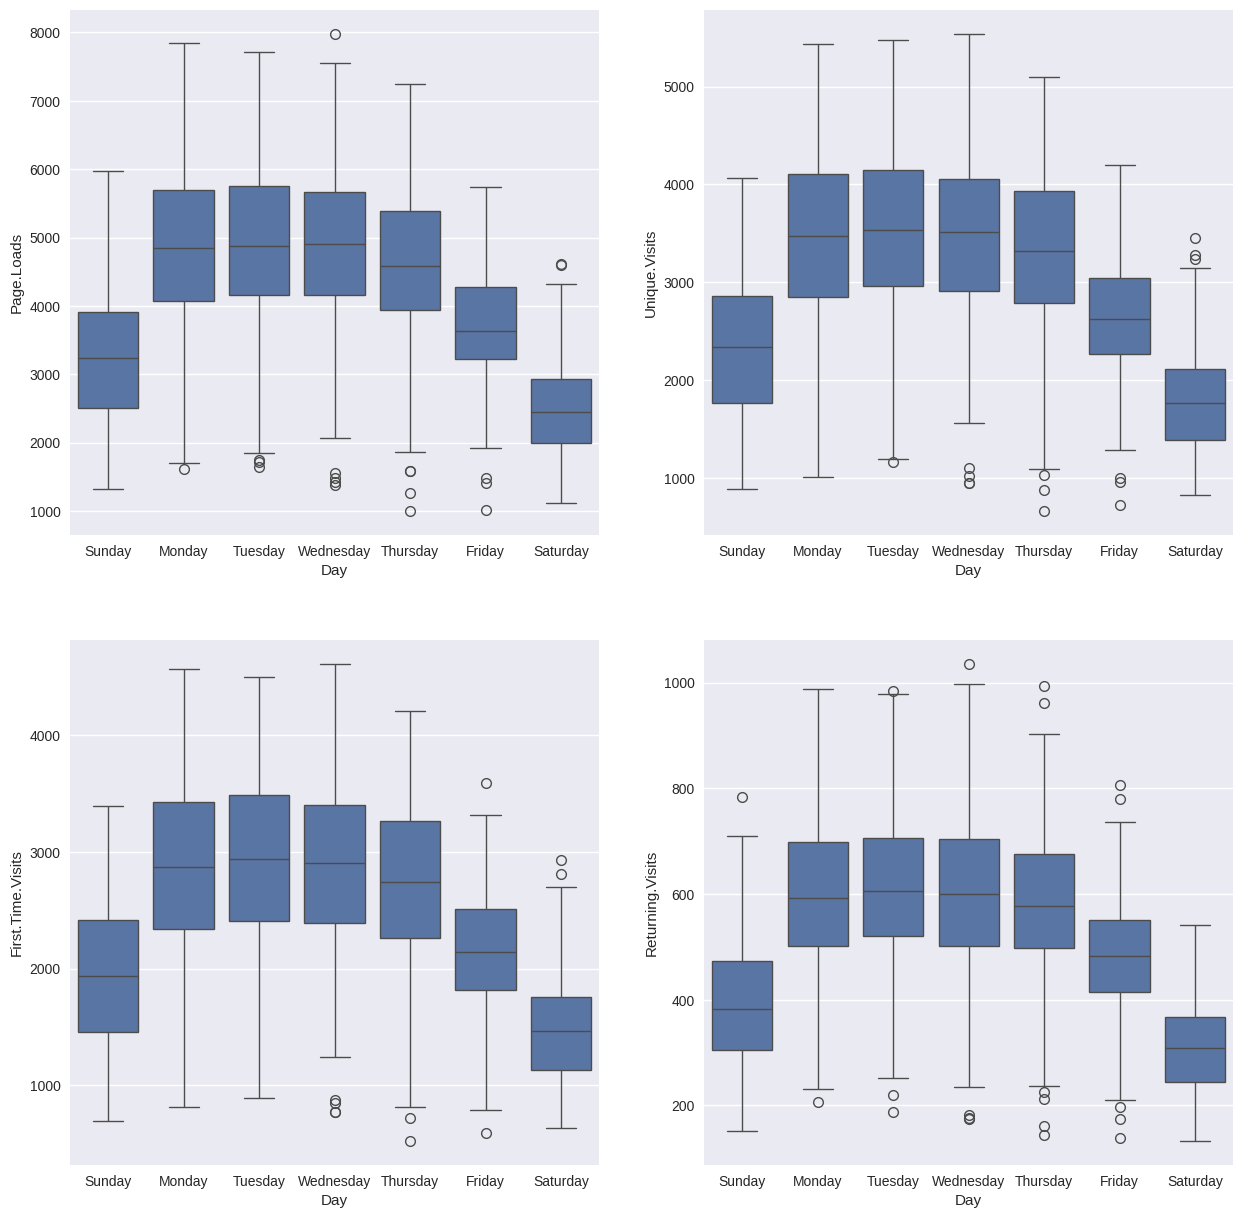

In [ ]:
cols_to_plot = ['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']
plt.figure(figsize=(15, 15))
for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=data, x='Day', y=col)

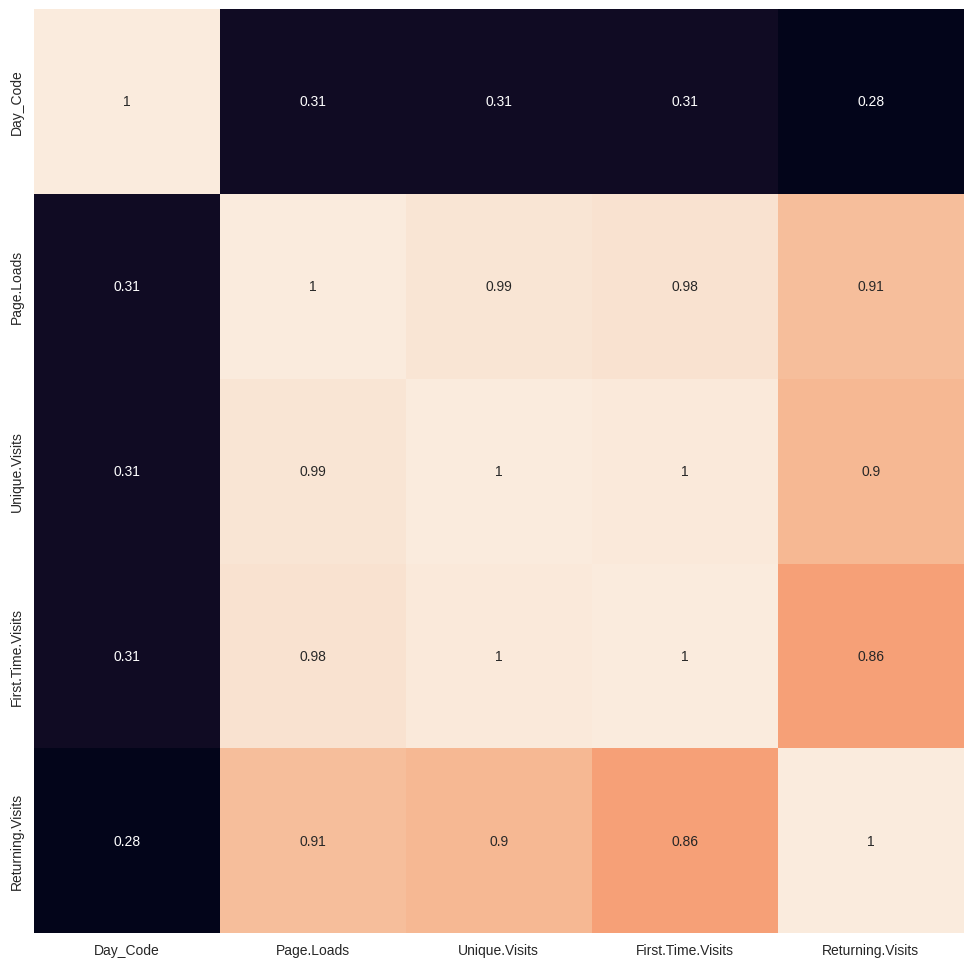

In [ ]:
data['Day_Code'] = pd.Categorical(data['Day']).codes
corr_matrix = data[['Day_Code', 'Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cbar=False)
plt.show()

# ***Conclusion***

This EDA establishes a foundation for forecasting models by highlighting temporal trends, identifying influential days, and preparing the dataset with essential transformations.

High positive correlation can be observed between the following features:

1. Page.Loads and Returning.Visits
2. Returning.Visits and Unique.Visits
3. Returning.Visits and First.Time.Visits